In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys
import corner
sys.path.append('./2025/Field_research/Utils')
sndata = pd.read_csv('./Data/parsonage.txt', sep = ' ', engine='python')

In [4]:
# observed data
mb = sndata['mb'].values
dmb = sndata['dmb'].values
z = sndata['zcmb'].values

# 1. SN data

## 1-1. Flat LCDM

In [3]:
import sys
sys.path.append('./2025/Field_research/Utils')
from utils_flat import *
import multiprocess as mp

In [4]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0.],[1.]])
    normal_vec = np.array([0.0003])*10
    std = np.array([0])*0.1
    paraminit = np.array([0.9999742233029345]) + np.random.normal(0,std)
    nstep = int(2e6)
    return MCMC(Other_stuff_flat, paraminit, sndata, nstep, normal_vec, Prior1)

In [ ]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

In [ ]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
#MCMC_test = MCMC_test[:,200:]
accept_ratio = np.unique(MCMC_test).shape[0] / (2e3*4-200*4)

Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.hist(MCMC_test[0],bins=50,alpha=0.5, label='Omega_m')

In [ ]:
def run_mcmc_fin(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0.],[1.]])
    normal_vec = np.array([1.3357049031167966e-06])*0.02
    std = np.array([0])
    paraminit = np.array([5.95230321791345e-6]) + np.random.normal(0,std)
    nstep = int(1.6*1e6)
    return MCMC(Other_stuff_flat, paraminit, sndata, nstep, normal_vec, Prior1)
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_fin, range(n_chain))
for i in range(n_chain):
    np.save(f'./2025/FIeld_research/Results/MCMC_flat_SN_{i}.npy', results[i])

accept_ratio = 0.1335965965965966
Best_fit = Omega_m : 0.9999999993904228, likelihood = -1649.1669821575435
std = 0.0005161480983952875


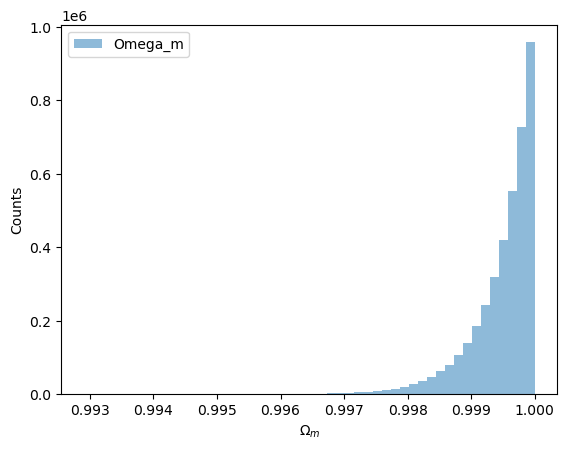

In [11]:
results = np.load('./2025/Field_research/Results/MCMC_flat_SN_0.npy'),np.load('./2025/Field_research/Results/MCMC_flat_SN_1.npy'),np.load('./2025/Field_research/Results/MCMC_flat_SN_2.npy'), np.load('./2025/Field_research/Results/MCMC_flat_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_fin).shape[0] / (2e6*4-burn_in*4)

Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.hist(MCMC_fin[0],bins=50,alpha=0.5, label='Omega_m')
plt.xlabel(r'$\Omega_m$')
plt.ylabel('Counts')
plt.legend()
plt.savefig('./2025/Field_research/Results/MCMC_flat_SN.png', dpi=300, bbox_inches='tight')

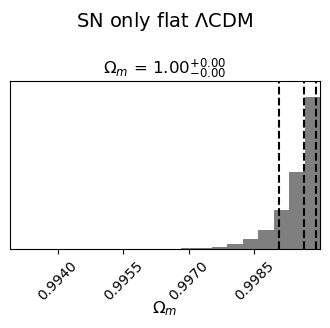

In [19]:
arr = MCMC_fin[0].T
fig = corner.corner(arr, labels=[r'$\Omega_m$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN only flat $\Lambda$CDM', fontsize=14)
fig.tight_layout()

## 1-2. Curved LCDM

In [16]:
import utils_curved as uc
import multiprocess as mp

In [17]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., -3.],[20, 3]])
    std = np.array([0.7765663, 0.5880332])
    normal_vec = np.array([1., 0.2])
    paraminit = np.array([2.5,  2.5]) + np.random.normal(0,std)
    nstep = int(1e3)
    return uc.MCMC(uc.Other_stuff_curved, paraminit, sndata, nstep, normal_vec, Prior2)


n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

  0%|                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]/Users/john1256/KASI_Ms/2025/Field_research/Utils/utils_curved.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  grid_Ez = np.array([quad_vec(E_inverse_curved, 0,n, args=(Omegam, Omegalamb))[0] for n in grid])
  1%|█▋                                                                                                                                                            | 11/1000 [00:00<00:28, 34.71it/s]/Users/john1256/KASI_Ms/2025/Field_research/Utils/utils_curved.py:42: RuntimeWarning: invalid value encountered in log10
  Bval = 5*np.log10((1+z)*func(z,parm))
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

In [18]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.211875
Best_fit = Omega_m : 3.4737338714785038, Omegalamb : -0.15324266229013012, likelihood = -497.01296177320256
std = [0.08946725 0.16278326]


Text(0.5, 1.0, 'MCMC result for Flat LCDM')

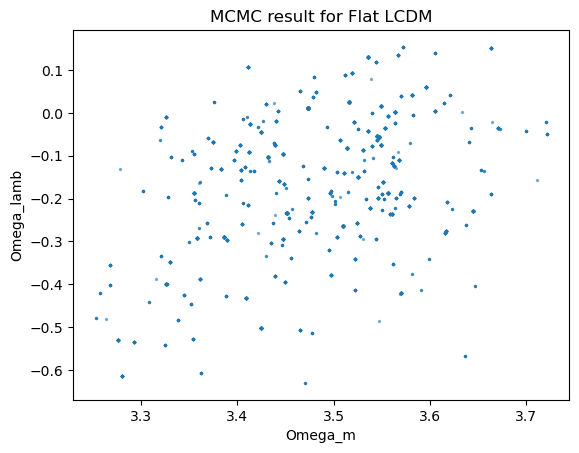

In [19]:
accept_ratio = np.unique(MCMC_test).shape[0] / (1e3*4-burn_in*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel('Omega_m')
plt.ylabel('Omega_lamb')
plt.title('MCMC result for Flat LCDM')

accept_ratio = 0.08756287575150301
Best_fit = Omega_m : 3.5022389061452817, Omegalamb : 5.865439484064282e-05
std = [0.07432689 0.05727419]


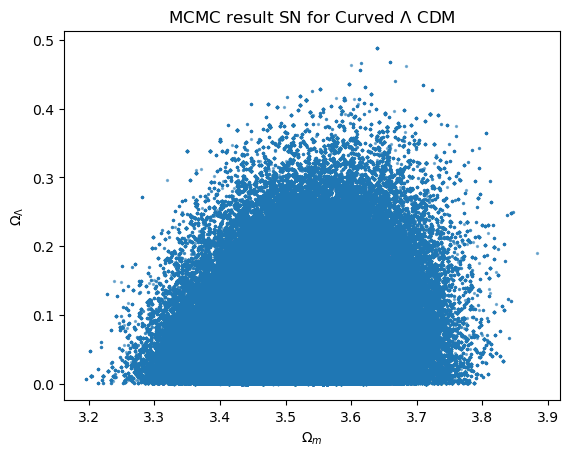

In [5]:
results = np.load(f'./2025/Field_research/Results/MCMC_curved_SN_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
nstep = MCMC_fin.shape[1]
accept_ratio = np.unique(MCMC_fin).shape[0] / (nstep)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$\Omega_\Lambda$')
plt.title(r'MCMC result SN for Curved $\Lambda$ CDM')
plt.savefig('MCMC_result_curved_LCDM.png')

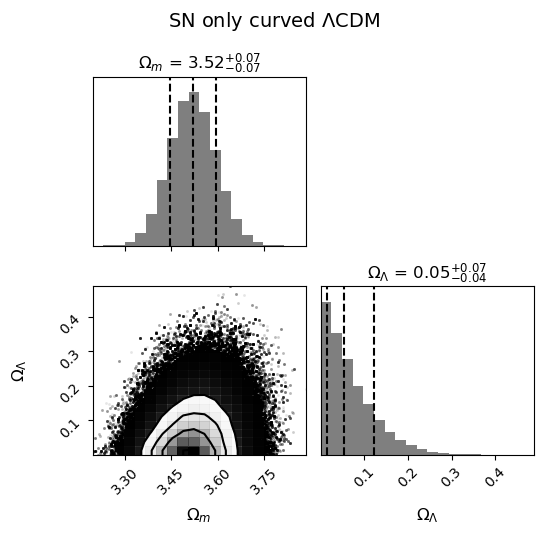

In [7]:
arr = MCMC_fin[:2].T
fig = corner.corner(arr, labels=[r'$\Omega_m$', r'$\Omega_\Lambda$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN only curved $\Lambda$CDM', fontsize=14)
fig.tight_layout()

# 2. SN + BAO data


BAO data consists of 
$$D_V(z) = \left[\cfrac{cz}{H_0}\cfrac{D_M^2(z)}{E(z)} \right]^{1/3}$$
$$D_M(z) = d_p(z)$$
$$R_{eq} = 3\rho_{eq}/4\rho_{rad} \approx \cfrac{3}{4} \cfrac{\Omega_{b,0}h^2}{1.48\times10^{-6}}\cfrac{1}{1+z_{eq}}$$
$$f_{baryon} = \cfrac{\Omega_{b,0}}{\Omega_{m,0}} = 0.167$$
$$z_{rec} \approx 2426.3839 \ (\text{Calculated using CAMB}) $$
$$1+z_{eq} = \cfrac{\Omega_{m,0}}{\Omega_{rad,0}} = \cfrac{\Omega_{m,0}h^2}{1.48\times10^{-6}}$$

We calculate the $r_{d,fid}$ with the following equation.
$$r_{d,fid} = \cfrac{1}{\sqrt{\Omega_{m,0}H_0^2}}\cfrac{2c}{\sqrt{3z_{eq}R_{eq}}}\ln\left[\cfrac{\sqrt{1+R_{rec}} + \sqrt{R_{rec} + R_{eq}}}{1 + \sqrt{R_{eq}}}\right]$$

In [14]:
# BAO data
BAO_z = np.array([0.094,0.157,0.402,0.402,0.526,0.526,0.597,0.597])
BAO_val = np.array([0.08,1849.05,4006.83,43.48,4650.20,51.31,5053.80,58.64])
BAO_err = np.array([0.003,66.648,59.924,1.334,68.103,1.512,75.657,1.292])
BAO_ind = np.array([1,2,3,4,3,4,3,4]) 
# 1 : r_s/D_V, 2 : D_V(r_d,fid/r_d), 3 : D_M(r_d,fid/r_d), 4 : H(r_d/r_d,fid)
BAO_data = pd.DataFrame({
    'z': BAO_z,
    'val': BAO_val,
    'err': BAO_err,
    'ind': BAO_ind
})

Name 		type 	zcmb 		value		error
7dfGS 1 0.094 0.08 0.003 
WDSS 2 0.157 1849.05 66.648
EXMOS 3 0.402 4006.83 59.924
EXMOS 4 0.402 43.48 1.334
EXMOS 3 0.526 4650.20 68.103
EXMOS 4 0.526 51.31 1.512
EXMOS 3 0.597 5053.80 75.657
EXMOS 4 0.597 58.64 1.292

## 2-1. Flat LCDM

In [22]:
import sys
import os
sys.path.append('./2025/Field_research/Utils')
import utils_flat_BAO as ufb
import multiprocess as mp

In [23]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., 4.66594018],[1, 36.39070654]])
    std = np.array([0., 0.57213598])
    normal_vec = np.array([0.0003, 0.11904393])*0.5
    paraminit = np.array([0.9999742233029345,  22.850391597263012]) + np.random.normal(0,std)
    nstep = int(1e3)
    return ufb.MCMC_BAO(ufb.Other_stuff_flat, ufb.BAO_flat, paraminit, sndata,BAO_data, nstep, normal_vec, Prior2)



In [24]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.14it/s]


/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [25]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.2225
Best_fit = Omega_m : 0.9999991930027766, Omegalamb : 23.495373230156957, likelihood = -28455.002728958967
std = [5.44893098e-05 3.71646411e-02]


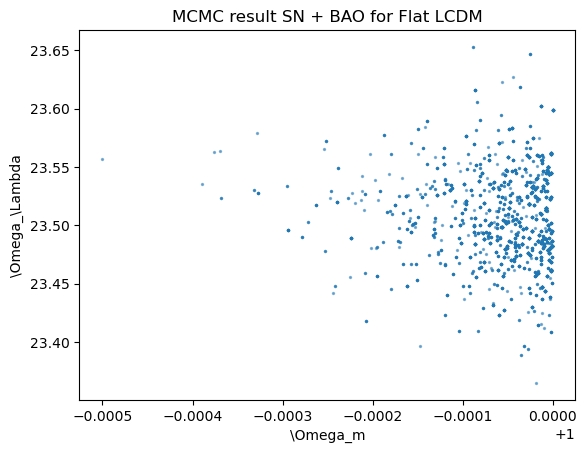

In [26]:
accept_ratio = np.unique(MCMC_test).shape[0] / (4*2e3-4*burn_in)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel(r'\Omega_m')
plt.ylabel(r'\Omega_\Lambda')
plt.title('MCMC result SN + BAO for Flat LCDM')
plt.savefig('./2025/Field_research/Results/MCMC_flat_BAO.png', dpi=300, bbox_inches='tight')

accept_ratio = 2.094375
Best_fit = Omega_m : 0.9999999490437813, Omegalamb : 31.681776660703175
std = [0.00048115 0.11065258]


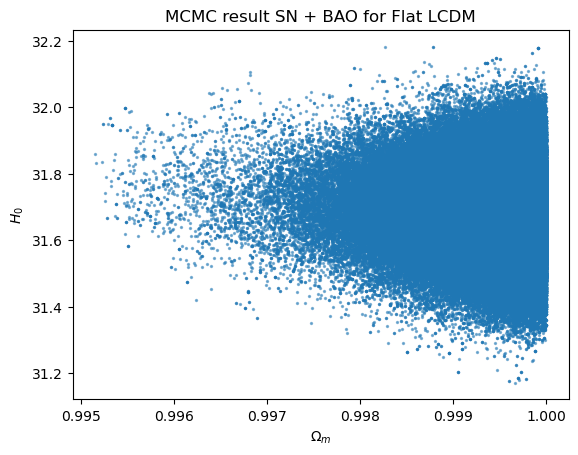

In [44]:
# real analysis
results = np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_3.npy')
burn_in = 2000
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_test).shape[0] / (4*1.5*1e5-4*burn_in)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$H_0$')
plt.title('MCMC result SN + BAO for Flat LCDM')
plt.savefig('./2025/Field_research/Results/MCMC_flat_BAO.png', dpi=300, bbox_inches='tight')

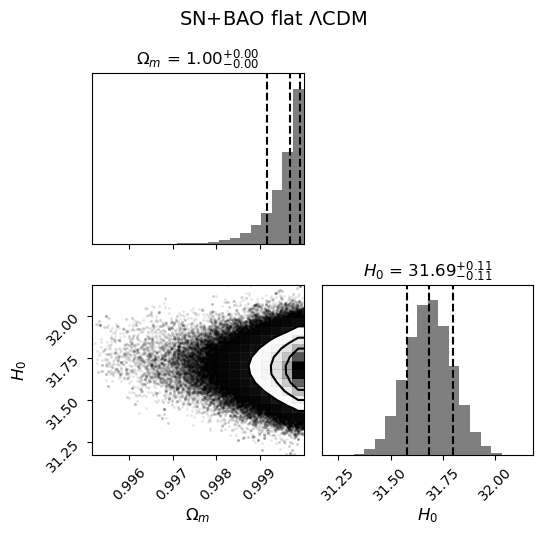

In [41]:
arr = MCMC_test[:2].T
fig = corner.corner(arr, labels=[r'$\Omega_m$', r'$H_0$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN+BAO flat $\Lambda$CDM', fontsize=14)
fig.tight_layout()

## 2-2. Curved LCDM

In [15]:
import sys
sys.path.append('./2025/Field_research/Utils')
import utils_curved_BAO as ucb
import multiprocess as mp

In [34]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., -3., 4.66594018],[20, 3, 35.39070654]])
    std = np.array([0.2096627, 0.0, 2.945705])
    normal_vec = np.array([0.7, 0.1, 1])*0.5
    paraminit = np.array([3.5,  0.1,20]) + np.random.normal(0,std)
    nstep = int(1e3)
    return ucb.MCMC_BAO(ucb.Other_stuff_curved, ucb.BAO_curved, paraminit, sndata,BAO_data, nstep, normal_vec, Prior2)

In [35]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.69it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 lea

In [38]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.1825
Best_fit = Omega_m : 3.514718101393202, Omegalamb : -0.15641369210470624, H0 : 20.28240798744998, loglikelihood = -505.55485652986494
std = [0.07023471 0.1158745  0.16163973]


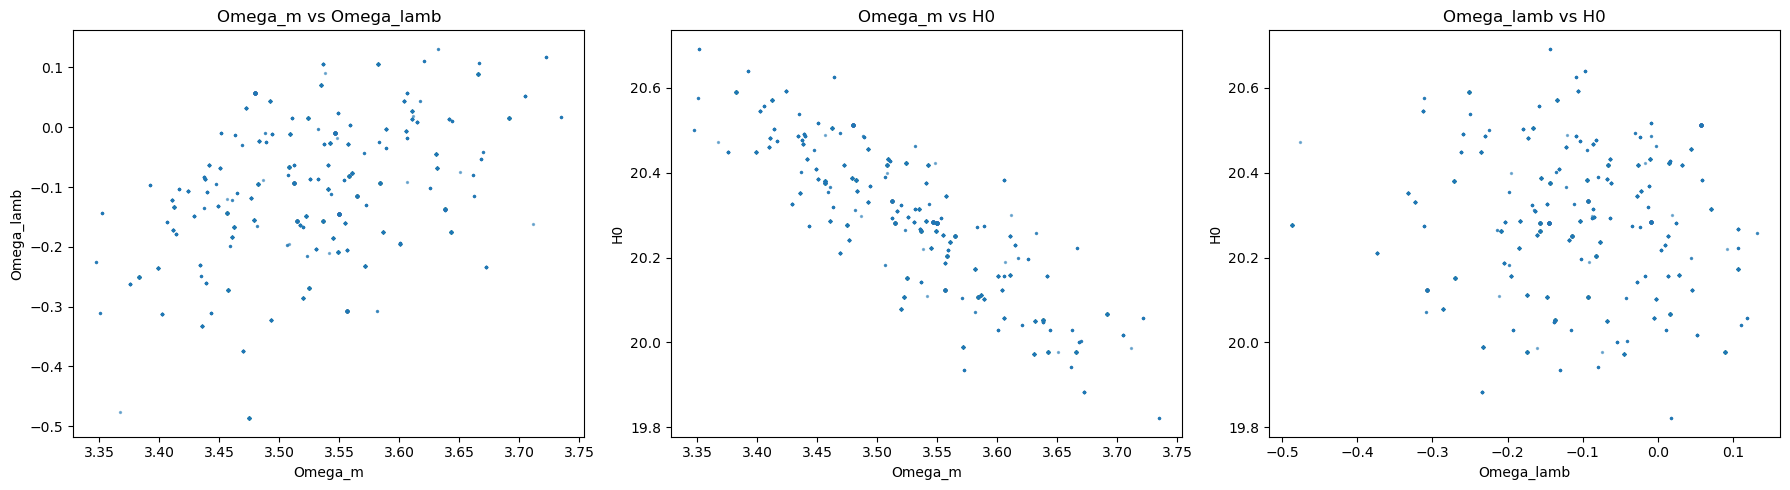

In [39]:
accept_ratio = np.unique(MCMC_test).shape[0] / (4e3-burn_in*4)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}, loglikelihood = {Best_fit[-1]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')

plt.tight_layout()
plt.show()

In [42]:
# showing results
results = np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.0427713567839196
Best_fit = Omega_m : 3.514266536914349, Omegalamb : -0.18787286391544725, H0 : 20.0875688573955
std = [0.0790695  0.13510082 0.17355321]


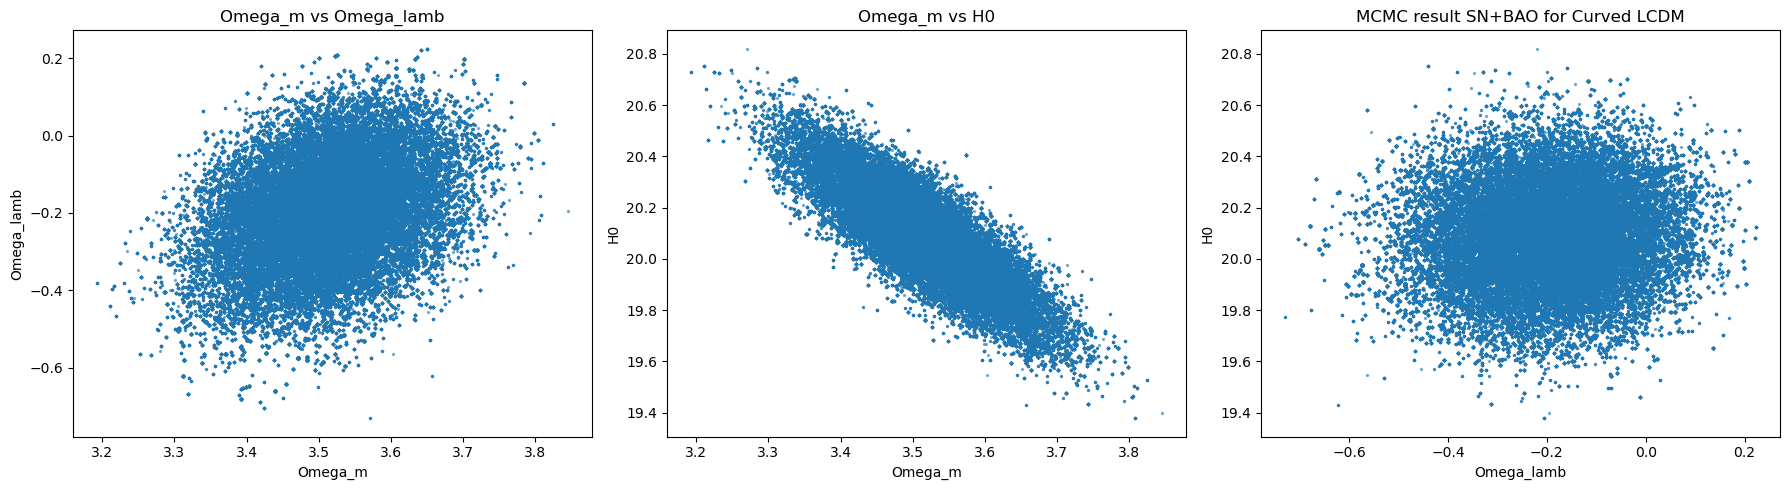

In [43]:
accept_ratio = np.unique(MCMC_fin[0:2]).shape[0] / (4*2*1e5-burn_in*4)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_fin[0], MCMC_fin[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_fin[1], MCMC_fin[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')
plt.title('MCMC result SN+BAO for Curved LCDM')
plt.tight_layout()
plt.savefig('MCMC_result_curved_LCDM_SN+BAO.png')
plt.show()

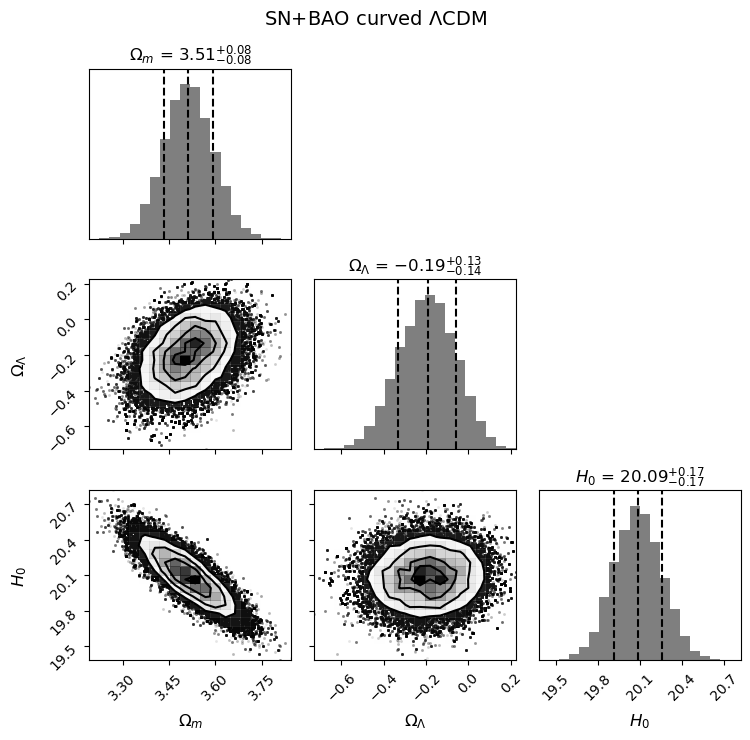

In [45]:
arr = MCMC_fin[:3].T
fig = corner.corner(arr, labels=[r'$\Omega_m$',r'$\Omega_\Lambda$', r'$H_0$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN+BAO curved $\Lambda$CDM', fontsize=14)
fig.tight_layout()

# 3. Results in comparison with the data

## 3-1. SN Flat LCDM

In [9]:
import utils_flat as uf

Text(0.5, 1.0, 'MCMC Best Fit for Flat $\\Lambda$CDM SN Data')

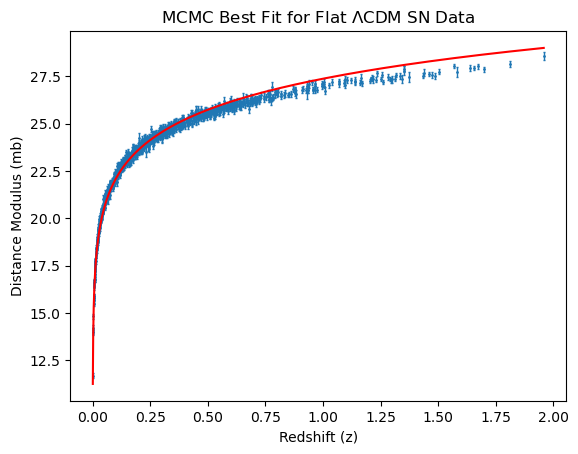

In [ ]:
results = np.load('./2025/Field_research/Results/MCMC_flat_SN_0.npy'),np.load('./2025/Field_research/Results/MCMC_flat_SN_1.npy'),np.load('./2025/Field_research/Results/MCMC_flat_SN_2.npy'), np.load('./2025/Field_research/Results/MCMC_flat_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]

parm_flat = np.array([Best_fit[0]])
m_calc_SNflat = uf.A(uf.Other_stuff_flat, mb, dmb,z, parm_flat) + uf.B(uf.Other_stuff_flat,parm_flat, z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNflat[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data',zorder=1)

plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red',zorder=2)
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Flat $\Lambda$CDM SN Data')

## 3-2 SN Curved LCDM

In [5]:
import utils_curved as uc

In [55]:
results = np.load(f'./2025/Field_research/Results/MCMC_curved_SN_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]

parm_curved = Best_fit[:2]
m_calc_SNcurved = uc.A(uc.Other_stuff_curved, mb, dmb,z, parm_curved) + uc.B(uc.Other_stuff_curved,parm_curved,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNcurved[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Curved $\Lambda$CDM SN Data')

NameError: name 'uc' is not defined

## 3-3. SN + BAO Flat LCDM

In [46]:
import utils_flat_BAO as ufb

In [47]:
results = np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_flat_SN+BAO_3.npy')
burn_in = 2000
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]

parmBAO_flat = Best_fit[:1]
m_calc_SNflat = ufb.A(ufb.Other_stuff_flat, mb, dmb,z, parmBAO_flat) + ufb.B(ufb.Other_stuff_flat,parmBAO_flat,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNflat[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Flat $\Lambda$CDM SN+BAO Data')

NameError: name 'mb' is not defined

In [48]:
parmBAO_flatbao = Best_fit[:2]
z_BAO = BAO_data['z'].values
ind_BAO = BAO_data['ind'].values

zarr = np.linspace(0.001, z_BAO.max()+0.1, 10)
zind1 = np.ones(zarr.shape[0])
zind2 = zind1 + 1
zind3 = zind1 + 2
zind4 = zind1 + 3
BAO_data_theory1 = pd.DataFrame({
    'z': zarr,
    'ind': zind1,
})
BAO_data_theory2 = pd.DataFrame({
    'z': zarr,
    'ind': zind2,
})
BAO_data_theory3 = pd.DataFrame({
    'z': zarr,
    'ind': zind3,
})
BAO_data_theory4 = pd.DataFrame({
    'z': zarr,
    'ind': zind4,
})
baoTheory_ind1 = ufb.BAO_flat(BAO_data_theory1, parmBAO_flatbao)
baoTheory_ind2 = ufb.BAO_flat(BAO_data_theory2, parmBAO_flatbao)
baoTheory_ind3 = ufb.BAO_flat(BAO_data_theory3, parmBAO_flatbao)
baoTheory_ind4 = ufb.BAO_flat(BAO_data_theory4, parmBAO_flatbao)


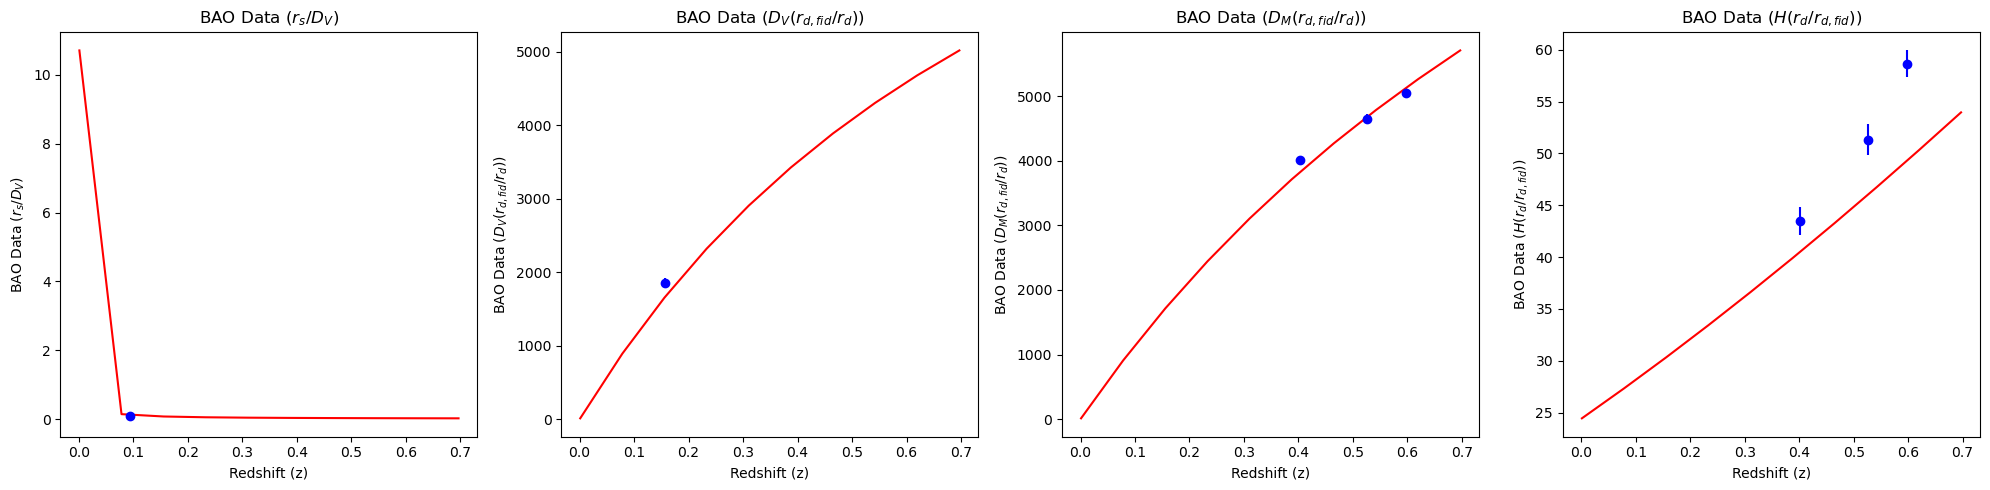

In [49]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].errorbar(z_BAO[ind_BAO==1], BAO_val[ind_BAO==1], yerr=BAO_err[ind_BAO==1], fmt='o', label='Observed Data', color='blue')
axs[0].plot(zarr, baoTheory_ind1, label='MCMC Best Fit', color='red')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel(r'BAO Data $(r_s/D_V)$')
axs[0].set_title(r'BAO Data $(r_s/D_V)$')
axs[1].errorbar(z_BAO[ind_BAO==2], BAO_val[ind_BAO==2], yerr=BAO_err[ind_BAO==2], fmt='o', label='Observed Data', color='blue')
axs[1].plot(zarr, baoTheory_ind2, label='MCMC Best Fit', color='red')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[1].set_title(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[2].errorbar(z_BAO[ind_BAO==3], BAO_val[ind_BAO==3], yerr=BAO_err[ind_BAO==3], fmt='o', label='Observed Data', color='blue')
axs[2].plot(zarr, baoTheory_ind3, label='MCMC Best Fit', color='red')
axs[2].set_xlabel('Redshift (z)')
axs[2].set_ylabel(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[2].set_title(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[3].errorbar(z_BAO[ind_BAO==4], BAO_val[ind_BAO==4], yerr=BAO_err[ind_BAO==4], fmt='o', label='Observed Data', color='blue')
axs[3].plot(zarr, baoTheory_ind4, label='MCMC Best Fit', color='red')
axs[3].set_xlabel('Redshift (z)')
axs[3].set_ylabel(r'BAO Data $(H(r_d/r_{d,fid}))$')
axs[3].set_title(r'BAO Data $(H(r_d/r_{d,fid}))$')
plt.tight_layout()


## 3-4. SN + BAO Curved LCDM

In [50]:
import utils_curved_BAO as ucb

Text(0.5, 1.0, 'MCMC Best Fit for Curved $\\Lambda$CDM SN+BAO Data')

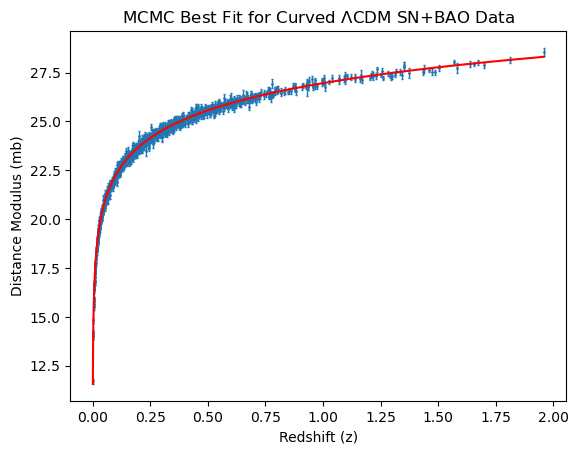

In [56]:
results = np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
parmBAO_curvedbao = Best_fit[:3]

parmBAO_curved = Best_fit[:2]
m_calc_SNcurved = ucb.A(ucb.Other_stuff_curved, mb, dmb,z, parmBAO_curved) + ucb.B(ucb.Other_stuff_curved,parmBAO_curved,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNcurved[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Curved $\Lambda$CDM SN+BAO Data')

In [52]:

parm_curved = np.array([ 3.50223891e+00,  5.86543948e-05,11.])

z_BAO = BAO_data['z'].values
ind_BAO = BAO_data['ind'].values

zarr = np.linspace(0.001, z_BAO.max()+0.1, 10)
zind1 = np.ones(zarr.shape[0])
zind2 = zind1 + 1
zind3 = zind1 + 2
zind4 = zind1 + 3
BAO_data_theory1 = pd.DataFrame({
    'z': zarr,
    'ind': zind1,
})
BAO_data_theory2 = pd.DataFrame({
    'z': zarr,
    'ind': zind2,
})
BAO_data_theory3 = pd.DataFrame({
    'z': zarr,
    'ind': zind3,
})
BAO_data_theory4 = pd.DataFrame({
    'z': zarr,
    'ind': zind4,
})
baoTheory_ind1 = ucb.BAO_curved(BAO_data_theory1, parmBAO_curvedbao)
baoTheory_ind2 = ucb.BAO_curved(BAO_data_theory2, parmBAO_curvedbao)
baoTheory_ind3 = ucb.BAO_curved(BAO_data_theory3, parmBAO_curvedbao)
baoTheory_ind4 = ucb.BAO_curved(BAO_data_theory4, parmBAO_curvedbao)

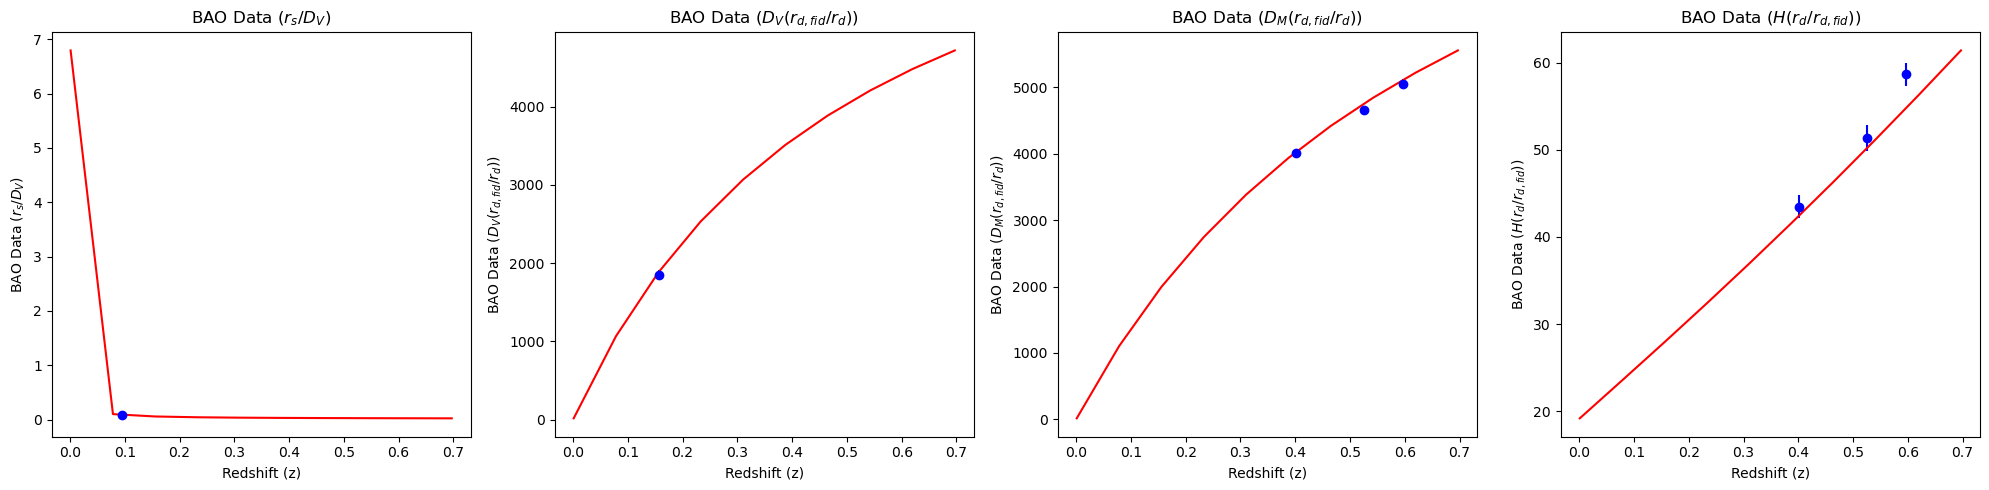

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].errorbar(z_BAO[ind_BAO==1], BAO_val[ind_BAO==1], yerr=BAO_err[ind_BAO==1], fmt='o', label='Observed Data', color='blue')
axs[0].plot(zarr, baoTheory_ind1, label='MCMC Best Fit', color='red')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel(r'BAO Data $(r_s/D_V)$')
axs[0].set_title(r'BAO Data $(r_s/D_V)$')
axs[1].errorbar(z_BAO[ind_BAO==2], BAO_val[ind_BAO==2], yerr=BAO_err[ind_BAO==2], fmt='o', label='Observed Data', color='blue')
axs[1].plot(zarr, baoTheory_ind2, label='MCMC Best Fit', color='red')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[1].set_title(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[2].errorbar(z_BAO[ind_BAO==3], BAO_val[ind_BAO==3], yerr=BAO_err[ind_BAO==3], fmt='o', label='Observed Data', color='blue')
axs[2].plot(zarr, baoTheory_ind3, label='MCMC Best Fit', color='red')
axs[2].set_xlabel('Redshift (z)')
axs[2].set_ylabel(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[2].set_title(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[3].errorbar(z_BAO[ind_BAO==4], BAO_val[ind_BAO==4], yerr=BAO_err[ind_BAO==4], fmt='o', label='Observed Data', color='blue')
axs[3].plot(zarr, baoTheory_ind4, label='MCMC Best Fit', color='red')
axs[3].set_xlabel('Redshift (z)')
axs[3].set_ylabel(r'BAO Data $(H(r_d/r_{d,fid}))$')
axs[3].set_title(r'BAO Data $(H(r_d/r_{d,fid}))$')
plt.tight_layout()